In [240]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Reading file

In [241]:
df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

# Exploratory Data Analysis

In [242]:
df.shape


(21613, 21)

In [243]:
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [244]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [245]:
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [246]:
df.dtypes.value_counts()


int64      15
float64     5
object      1
Name: count, dtype: int64

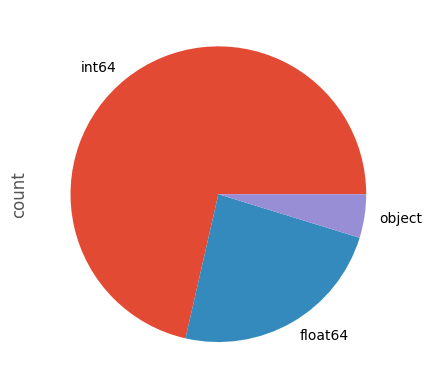

In [247]:
df.dtypes.value_counts().plot.pie()
plt.show()


In [248]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [249]:
df= df [[#'id', 
         #'date', 
         'price', 'bedrooms', 'bathrooms', 'sqft_living',
         'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
         #'zipcode',
         'lat', 'long', 
         'sqft_living15' , 'sqft_lot15'
                                          ]].copy()
     

In [250]:
df.head(5)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


# Checking for missing Data

In [251]:
df.isna().sum()


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [252]:
df.loc[df.duplicated()]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,47.6499,-122.088,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,47.5213,-122.357,1070,928
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,47.5443,-122.172,2290,7984
20054,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,47.5644,-122.093,1880,3078
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,47.5818,-122.402,1510,1352


In [253]:
df.duplicated(subset=['price','sqft_living','yr_built'])

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


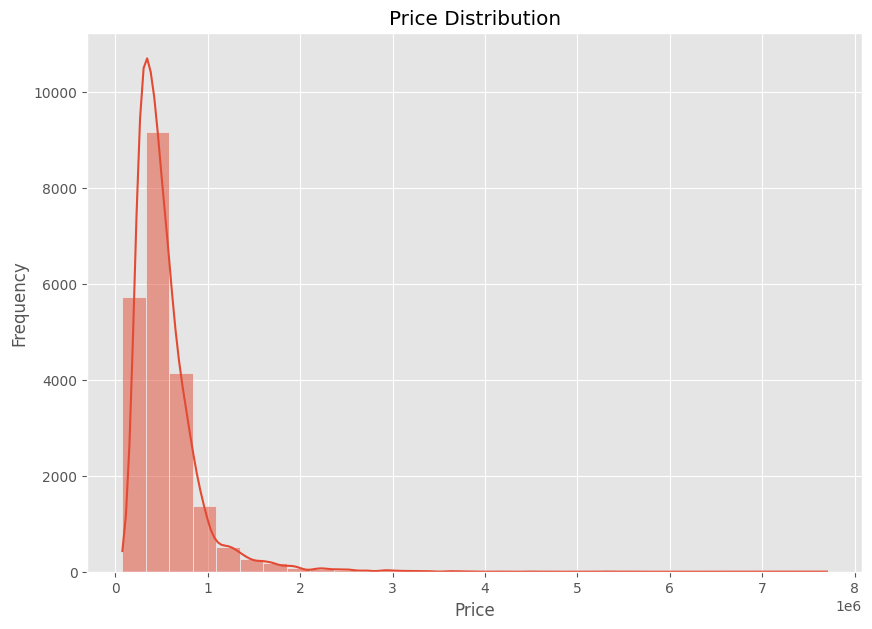

In [255]:
plt.figure(figsize = (10,7))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [256]:
t = 2.5*10**6
df= df[df['price']<= t]

In [257]:
df.shape

(21516, 18)

In [258]:
df['floors'].value_counts()
    

floors
1.0    10663
2.0     8176
1.5     1908
3.0      611
2.5      151
3.5        7
Name: count, dtype: int64

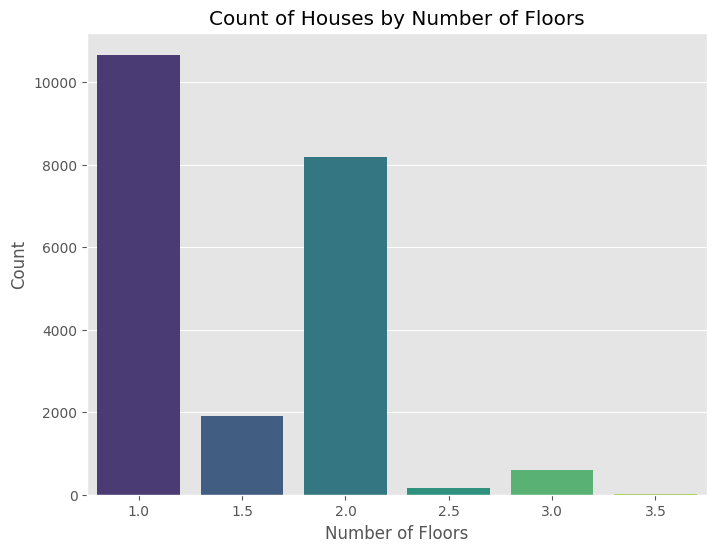

In [259]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='floors', palette='viridis')
plt.title('Count of Houses by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()


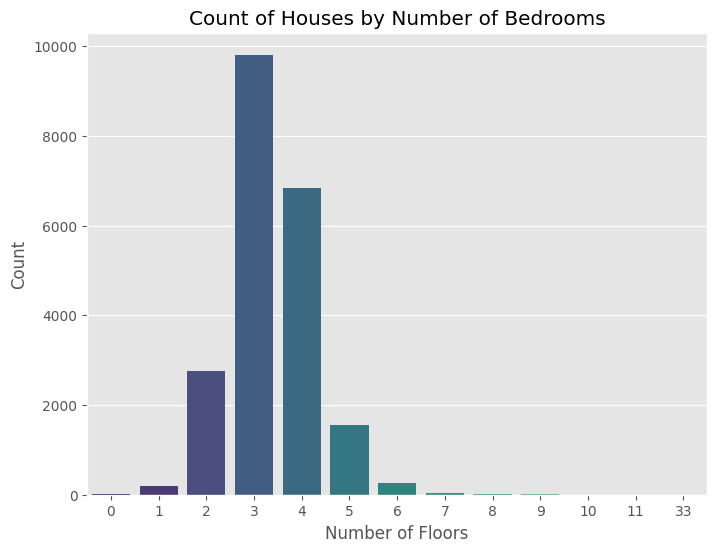

In [260]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='bedrooms', palette='viridis')
plt.title('Count of Houses by Number of Bedrooms')
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()


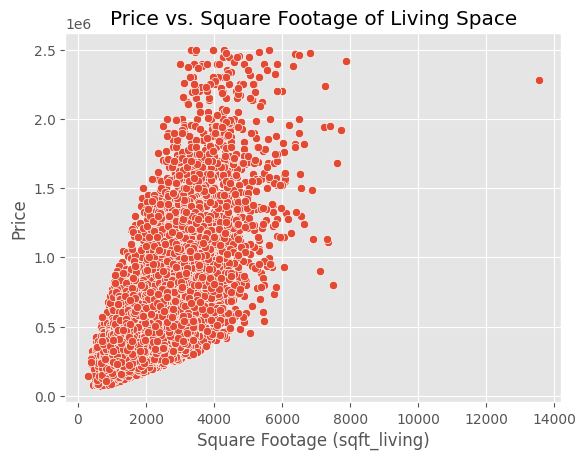

In [261]:
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('Price vs. Square Footage of Living Space')
plt.xlabel('Square Footage (sqft_living)')
plt.ylabel('Price')
plt.show()

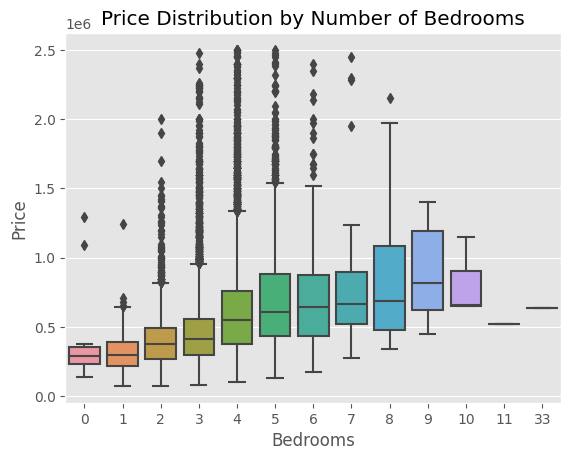

In [262]:
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

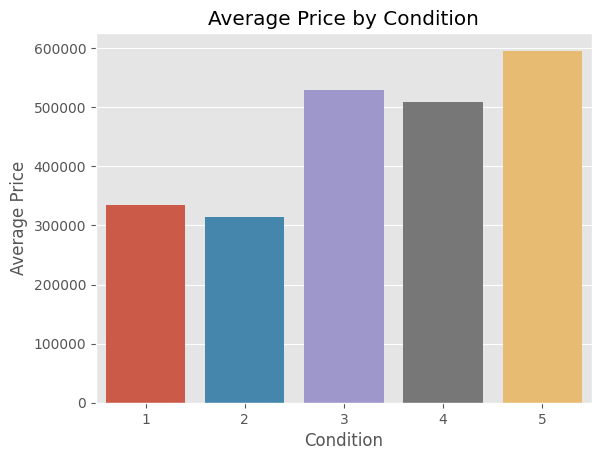

In [263]:
avg_price_condition = df.groupby('condition')['price'].mean().reset_index()
sns.barplot(data=avg_price_condition, x='condition', y='price')
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.show()

In [264]:
correlation_matrix = df.corr()

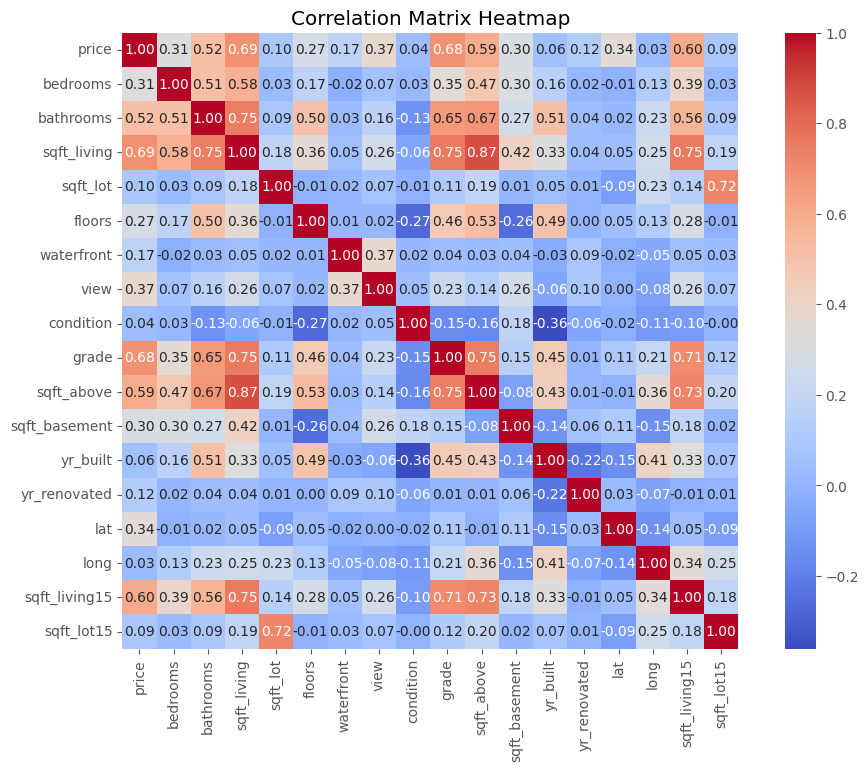

In [265]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [266]:
df.corr()["price"].sort_values(ascending = False)


price            1.000000
sqft_living      0.686547
grade            0.681342
sqft_living15    0.602705
sqft_above       0.592470
bathrooms        0.515018
view             0.368679
lat              0.344771
bedrooms         0.314014
sqft_basement    0.296185
floors           0.273320
waterfront       0.172497
yr_renovated     0.123875
sqft_lot         0.098049
sqft_lot15       0.088043
yr_built         0.056358
condition        0.039085
long             0.032326
Name: price, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

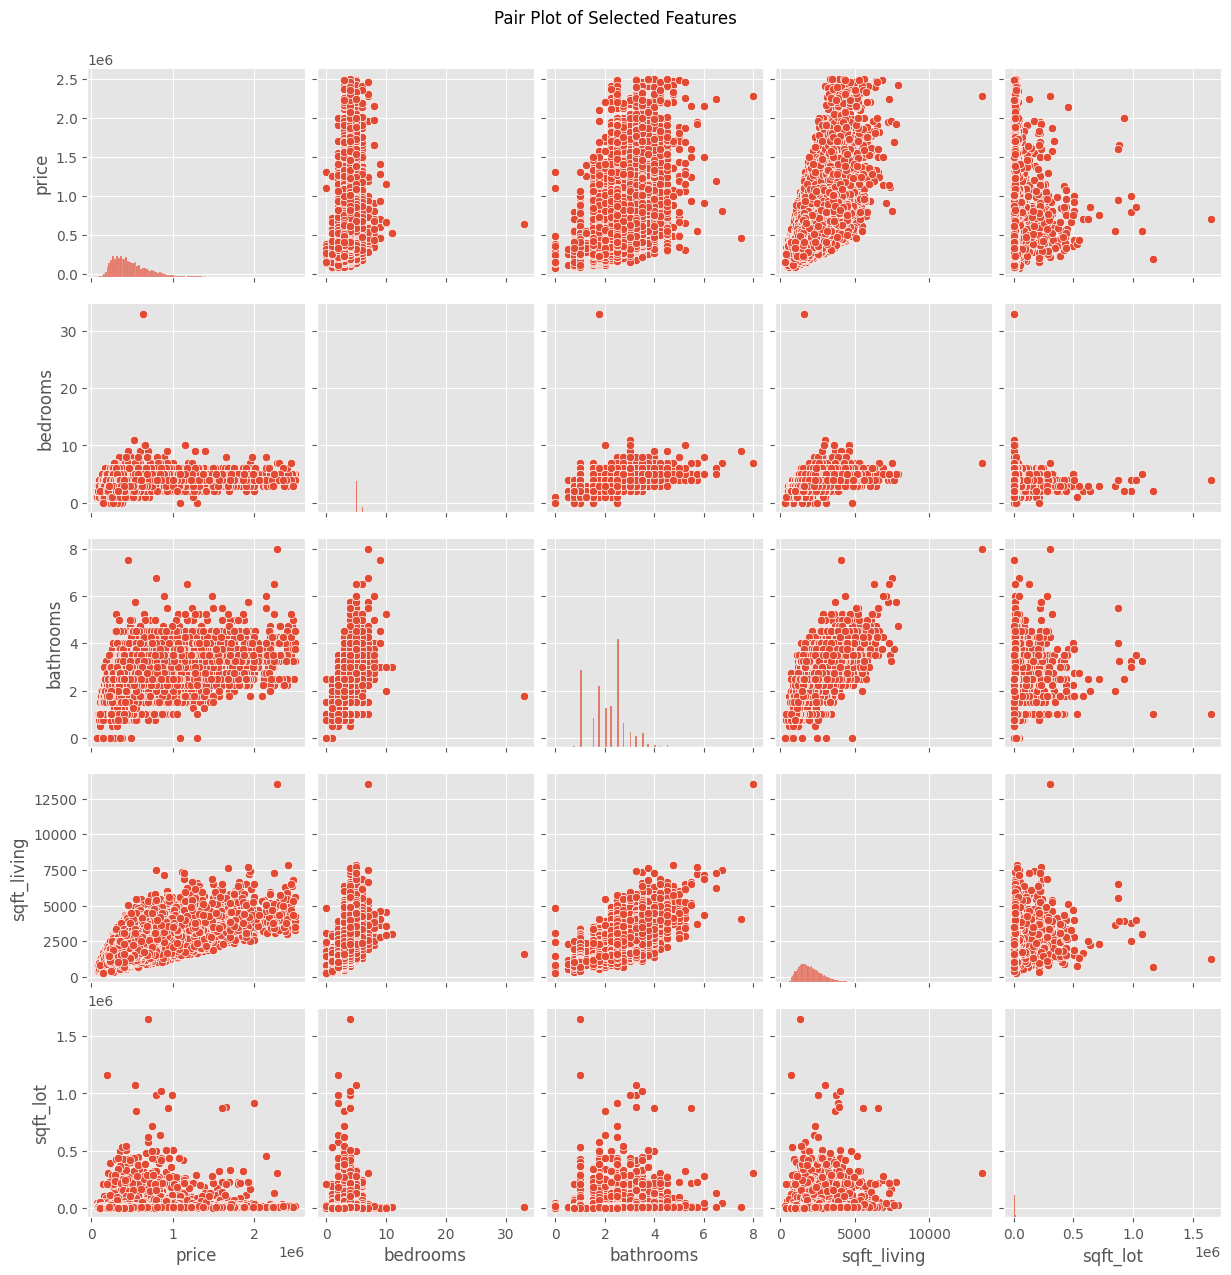

In [267]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


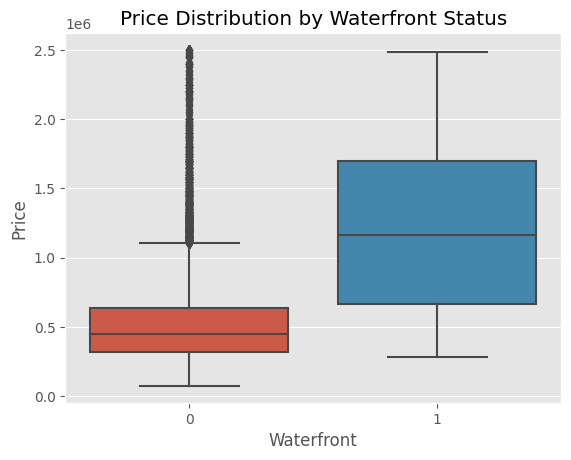

In [268]:
sns.boxplot(data=df, x='waterfront', y='price')
plt.title('Price Distribution by Waterfront Status')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()


# Data Splitting

In [269]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [270]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 0)


In [271]:
print('Train size: ', train_set.shape[0], 'Test size: ', test_set.shape[0])


Train size:  17212 Test size:  4304


# Modelization And Evaluation

<Figure size 640x480 with 0 Axes>

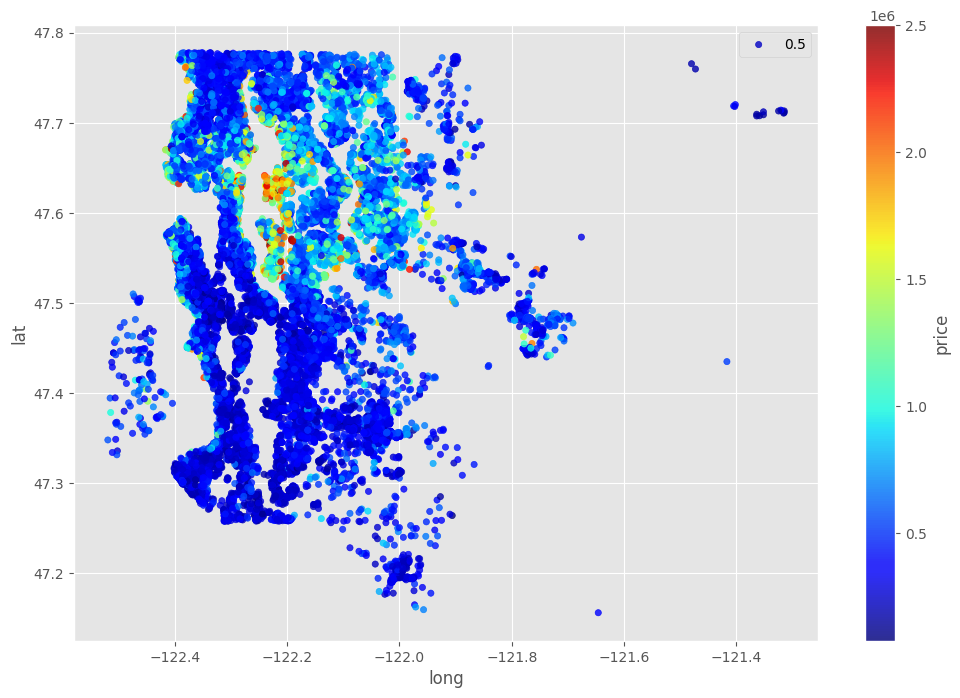

In [272]:
plt.figure()
df.plot(kind = 'scatter', x = 'long', y = 'lat', alpha = 0.8, c = 'price',cmap=plt.get_cmap('jet'), figsize = (12,8))
plt.legend(['0.5', '1.0', '1.5', '2', '2.5', '3', '3.5', '4'])
plt.show()

In [273]:
X_train = train_set.drop('price', axis = 1)
y_train = train_set['price']
X_test = test_set.drop('price', axis = 1)
y_test = test_set['price']

In [274]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [275]:
print(X_train.shape, X_test.shape)

(17212, 17) (4304, 17)


# Linear Regression

In [276]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [277]:
y_pred_lin = lin_reg.predict(X_test)
y_test1 = np.array(y_test)

In [278]:
mse_lin = mean_squared_error(y_test,y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print('RMSE of Linear Regression is: ', round(rmse_lin,1))

RMSE of Linear Regression is:  167347.9


# Decision Tree


In [279]:
from sklearn.tree import DecisionTreeRegressor


In [280]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [281]:
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test1, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print('RMSE of Decision Tree is: ', round(rmse_tree,1))

RMSE of Decision Tree is:  161904.2


# Random Forest Regressor

In [282]:
from sklearn.ensemble import RandomForestRegressor


In [283]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [284]:
y_pred_forest = forest_reg.predict(X_test)
mse_forest = mean_squared_error(y_test1, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
print('RMSE of Random Forest method is: ', round(rmse_forest,1))

RMSE of Random Forest method is:  114506.7


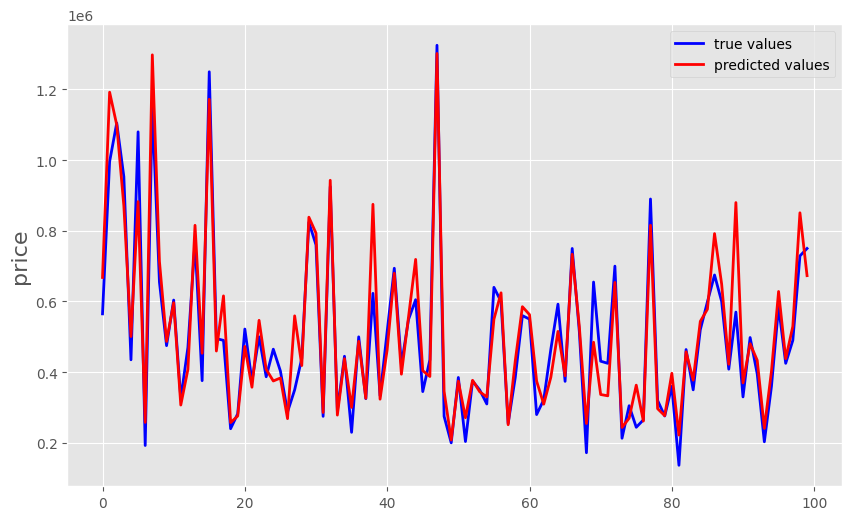

In [285]:
some_values = X_test[:100]
y_pred_some_values = forest_reg.predict(some_values)
y_true_some_values = y_test1[:100]

plt.figure(figsize = (10,6))
plt.plot(y_true_some_values, 'b', lw = 2, label = 'true values')
plt.plot(y_pred_some_values, 'r', lw = 2, label = 'predicted values')
plt.ylabel('price', fontsize = 16)
plt.legend()
plt.show()